In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from statsmodels.tsa.arima.model import ARIMA



In [3]:
data = pd.read_excel('DatiProject.xlsx', sheet_name=0)
data.head()

,Time,GDPC1,PCECTPI,TB3MS,GS10
0,1960-06-30,3430.057,15.331,3.5400,4.5033
1,1960-09-30,3439.832,15.415,4.2300,4.5833
2,1960-12-30,3517.181,15.435,3.8733,4.4867
3,1961-03-30,3498.246,15.515,2.9933,4.2600
4,1961-06-30,3515.385,15.574,2.3600,3.8333


In [4]:
data['log_gdp'] = np.log(data['GDPC1'])
data['log_cpi'] = np.log(data['PCECTPI'])
data['inflation'] = data['log_cpi'].diff().fillna(0)
data['tspread'] = data['GS10'] - data['TB3MS']
data['diff_log_gdp'] = data['log_gdp'].diff().fillna(0)
data.head()

,Time,GDPC1,PCECTPI,TB3MS,GS10,log_gdp,log_cpi,inflation,tspread,diff_log_gdp
0,1960-06-30,3430.057,15.331,3.5400,4.5033,8.140332,2.729877,0.000000,0.9633,0.000000
1,1960-09-30,3439.832,15.415,4.2300,4.5833,8.143178,2.735341,0.005464,0.3533,0.002846
2,1960-12-30,3517.181,15.435,3.8733,4.4867,8.165415,2.736638,0.001297,0.6134,0.022237
3,1961-03-30,3498.246,15.515,2.9933,4.2600,8.160017,2.741807,0.005170,1.2667,-0.005398
4,1961-06-30,3515.385,15.574,2.3600,3.8333,8.164904,2.745603,0.003796,1.4733,0.004887


Section 1

In [5]:
columns = ['log_gdp', 'diff_log_gdp', 'log_cpi', 'inflation', 'tspread']
titles = [r'$\log(GDP_t)$', r'$\Delta \log(GDP_t)$', r'$\log(CPI_t)$', r'$Inflation(\pi_t)$', r'$T spread_t$']

titles

['$\\log(GDP_t)$',
 '$\\Delta \\log(GDP_t)$',
 '$\\log(CPI_t)$',
 '$Inflation(\\pi_t)$',
 '$T spread_t$']

<Axes: xlabel='Time', ylabel='TB3MS'>

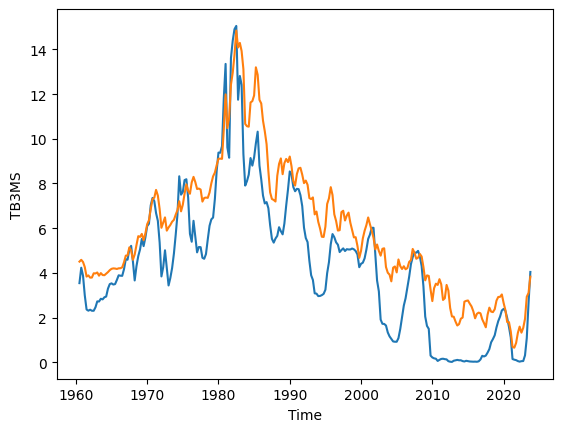

In [6]:
sns.lineplot(data=data, y='TB3MS', x='Time')
sns.lineplot(data=data, y='GS10', x='Time')


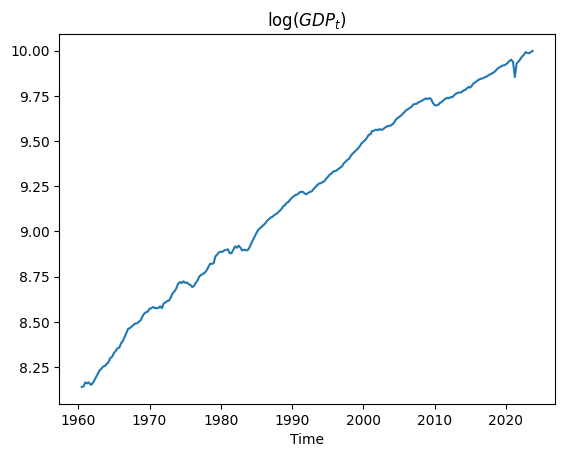

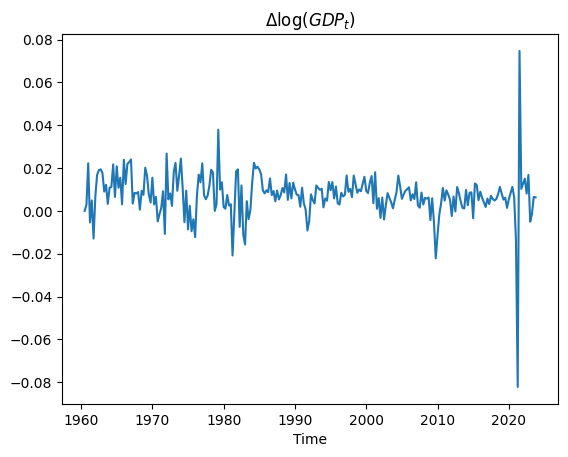

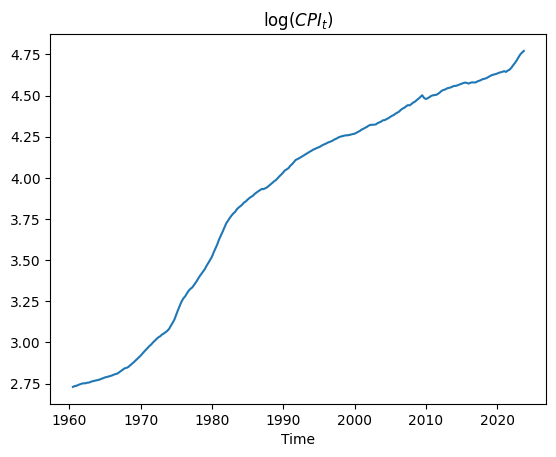

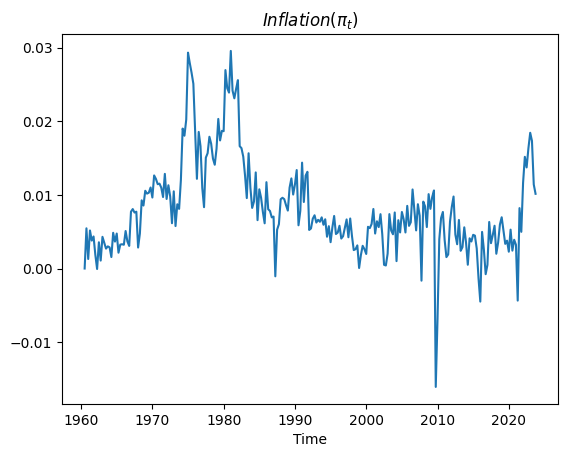

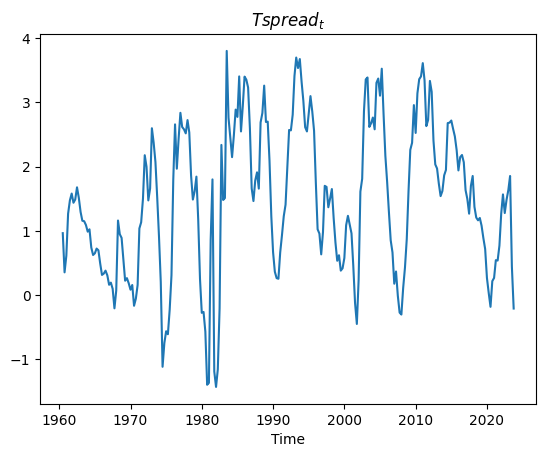

In [7]:
for column, title in zip(columns, titles):
    sns.lineplot(data=data, y=column, x='Time')
    plt.title(title)
    plt.ylabel('')
    plt.show()


Section 2

In [8]:
df = data[(data['Time'] < '1985-07-01') & (data['Time'] > '1960-07-10')].reset_index(drop=True)
df.head(), df.tail()

(        Time     GDPC1  PCECTPI   TB3MS    GS10   log_gdp   log_cpi  \
 0 1960-09-30  3439.832   15.415  4.2300  4.5833  8.143178  2.735341   
 1 1960-12-30  3517.181   15.435  3.8733  4.4867  8.165415  2.736638   
 2 1961-03-30  3498.246   15.515  2.9933  4.2600  8.160017  2.741807   
 3 1961-06-30  3515.385   15.574  2.3600  3.8333  8.164904  2.745603   
 4 1961-09-30  3470.278   15.642  2.3067  3.8867  8.151990  2.749960   
 
    inflation  tspread  diff_log_gdp  
 0   0.005464   0.3533      0.002846  
 1   0.001297   0.6134      0.022237  
 2   0.005170   1.2667     -0.005398  
 3   0.003796   1.4733      0.004887  
 4   0.004357   1.5800     -0.012914  ,
          Time     GDPC1  PCECTPI    TB3MS     GS10   log_gdp   log_cpi  \
 95 1984-06-30  7719.746   47.008   9.1400  11.6267  8.951537  3.850318   
 96 1984-09-30  7880.794   47.318   8.8000  11.6867  8.972184  3.856891   
 97 1984-12-30  8034.847   47.830   9.1700  11.9433  8.991543  3.867653   
 98 1985-03-30  8173.670   48.2

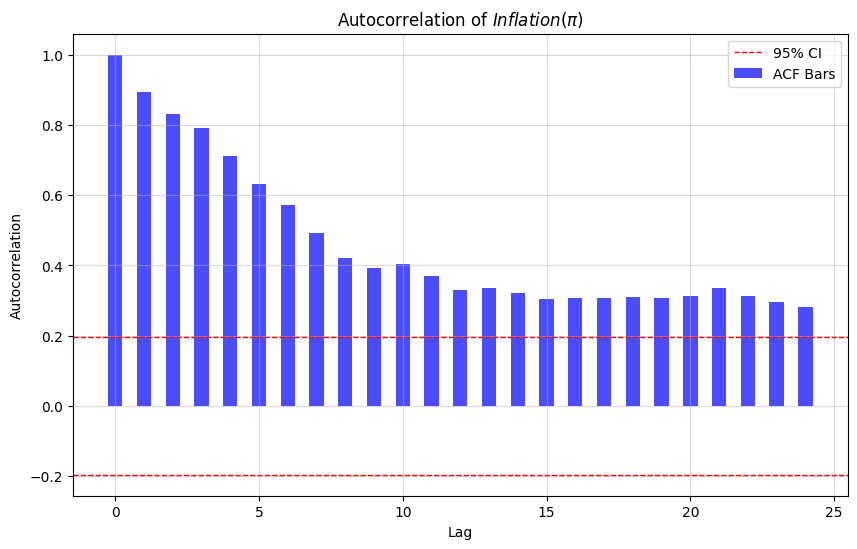

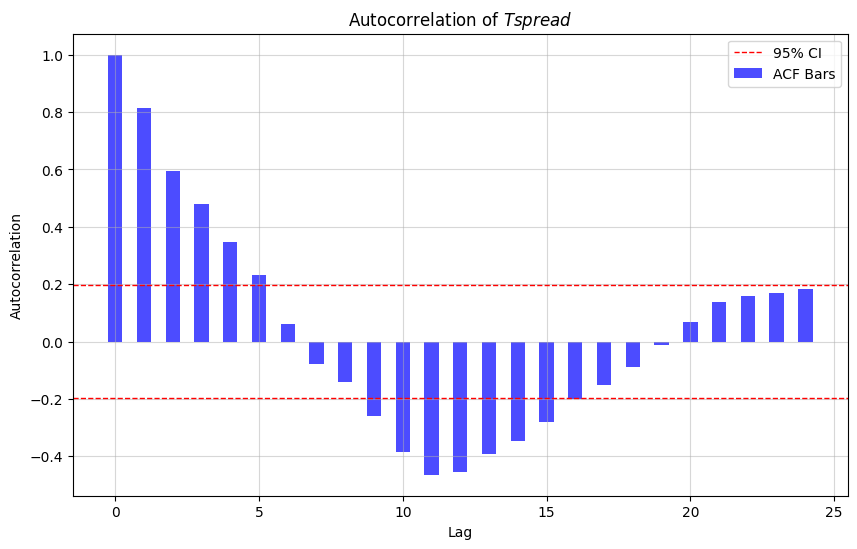

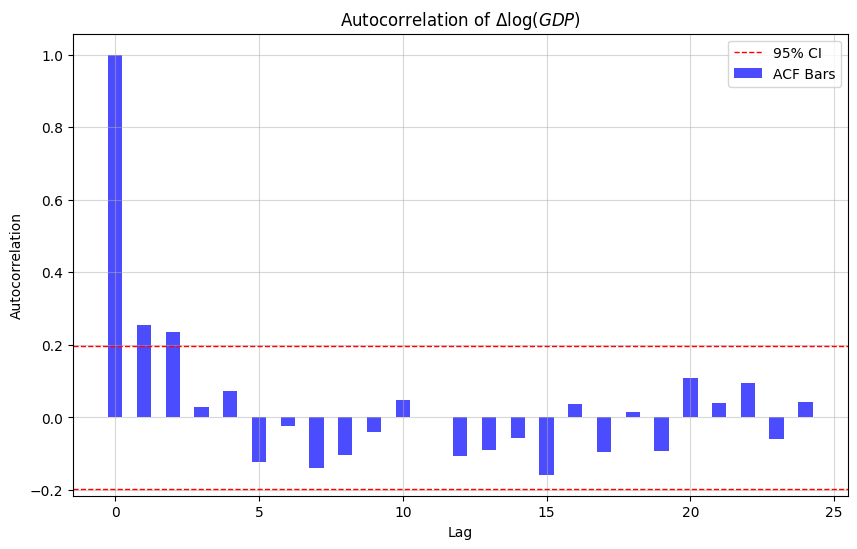

In [9]:
columns_autocorr = ['inflation', 'tspread', 'diff_log_gdp']
titles_autocorr = [ r'$Inflation(\pi)$', r'$T spread$', r'$\Delta \log(GDP)$' ]

for column, title in zip(columns_autocorr, titles_autocorr):
    time_series_data = df[column]

    acf_result = sm.tsa.acf(time_series_data, nlags=24)
    lags = np.arange(0, len(acf_result))

    plt.figure(figsize=(10, 6))
    plt.bar(lags, acf_result, width=0.5, color='b' , alpha=0.7, label='ACF Bars')

    plt.axhline(y=-1.96/np.sqrt(len(time_series_data)), color='red', linestyle='--', linewidth=1, label='95% CI')
    plt.axhline(y=1.96/np.sqrt(len(time_series_data)), color='red', linestyle='--', linewidth=1)

    plt.title(f'Autocorrelation of {title}')
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.grid(True, zorder=0, alpha=0.5)
    plt.legend()
    plt.show()

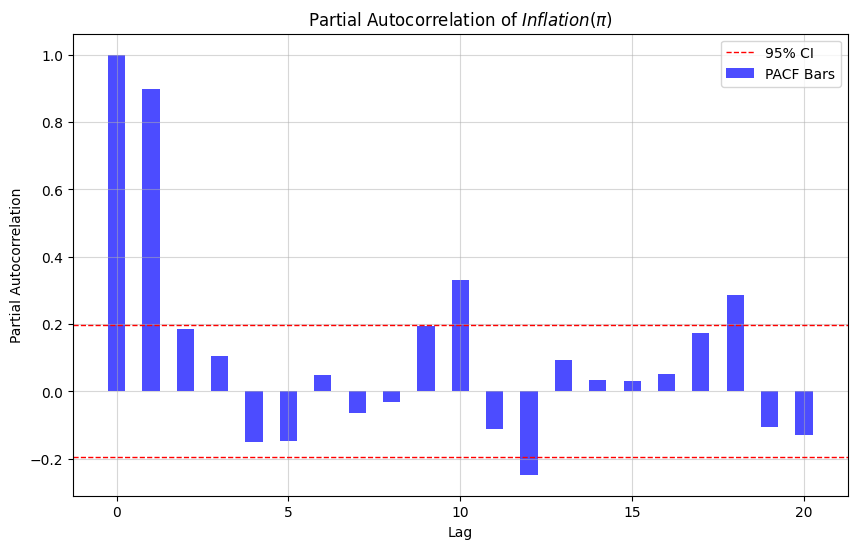

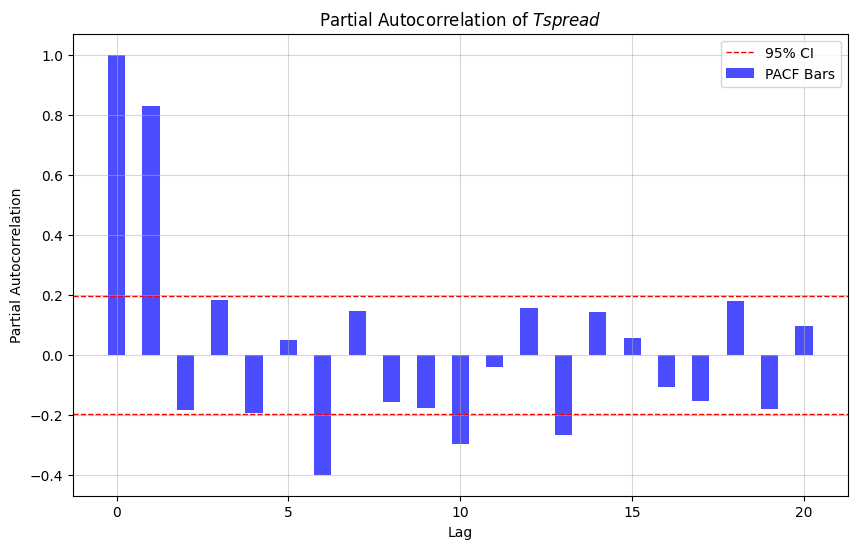

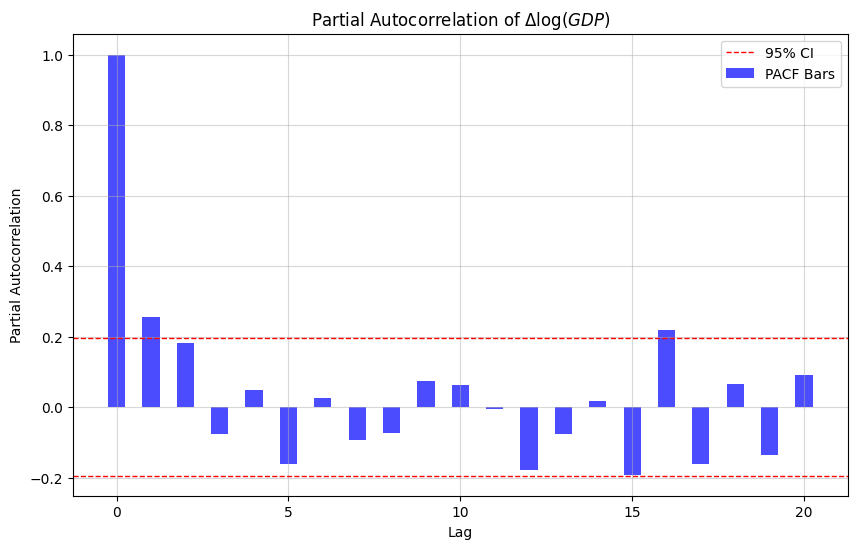

In [10]:
columns_parcorr = ['inflation', 'tspread', 'diff_log_gdp']
titles_parcorr = [ r'$Inflation(\pi)$', r'$T spread$', r'$\Delta \log(GDP)$' ]

for column, title in zip(columns_parcorr, titles_parcorr):
    time_series_data = df[column]
    pacf_result = sm.tsa.pacf(time_series_data, nlags=20, method='ols')  # Use PACF instead of ACF

    lags = np.arange(0, len(pacf_result))

    # Create the PACF plot
    plt.figure(figsize=(10, 6))
    plt.bar(lags, pacf_result, width=0.5, color='b', alpha=0.7, label='PACF Bars')  # Change ACF to PACF

    # Add significance lines
    plt.axhline(y=-1.96/np.sqrt(len(time_series_data)), color='red', linestyle='--', linewidth=1, label='95% CI')
    plt.axhline(y=1.96/np.sqrt(len(time_series_data)), color='red', linestyle='--', linewidth=1)

    plt.title(f'Partial Autocorrelation of {title}')  # Change title
    plt.xlabel("Lag")
    plt.ylabel("Partial Autocorrelation")  # Change y-axis label
    plt.grid(True, zorder=0, alpha=0.5)
    plt.legend()
    plt.show()

Find p for Var(p) models through AIC

In [11]:
model_vars = df[['diff_log_gdp', 'inflation', 'tspread']]
ps = range(1, 25)
aics = []
for p in ps:
    # Create VAR model
    model = VAR(model_vars)
    # Fit the model with the chosen lag order
    results = model.fit(p)
    aics.append(abs(results.aic))

i = np.argmin(aics)
p_min = i + 1
aic_min = aics[i]

print(p_min, aic_min)



1 21.52242321928951


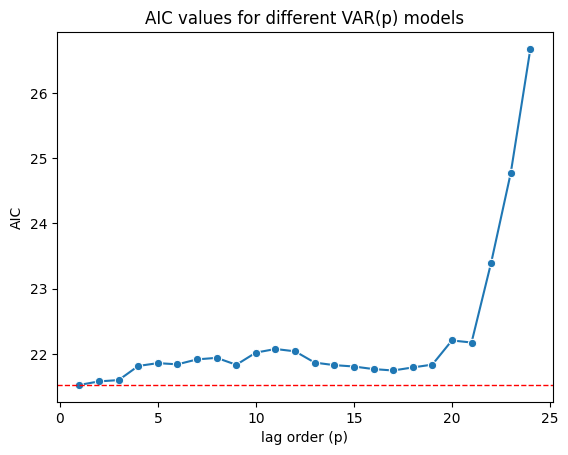

In [12]:
sns.lineplot(y=aics, x=list(ps), marker='o')
plt.xlabel('lag order (p)')
plt.ylabel('AIC')
plt.title('AIC values for different VAR(p) models')
plt.axhline(aic_min, color='red', linestyle='--', linewidth=1)



In [13]:
var1 = VAR(model_vars)
results_var1 = model.fit(1)
results_var1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 08, Dec, 2023
Time:                     17:09:49
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -21.2079
Nobs:                     99.0000    HQIC:                  -21.3952
Log likelihood:           655.935    FPE:                4.49767e-10
AIC:                     -21.5224    Det(Omega_mle):     3.99376e-10
--------------------------------------------------------------------
Results for equation diff_log_gdp
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.009531         0.002572            3.706           0.000
L1.diff_log_gdp         0.133974         0.096090            1.394           0.163
L1.inflation           -0.362962         0.14

In [14]:
residuals_var1 = results_var1.resid
residuals_var1

,diff_log_gdp,inflation,tspread
1,0.013502,-0.004896,0.016308
2,-0.018838,0.002211,0.620706
3,-0.004936,-0.001555,0.031433
4,-0.025086,-0.000002,0.061602
5,-0.003099,-0.002430,-0.348396
...,...,...,...
95,0.005647,0.003669,0.630359
96,0.007529,-0.006166,0.750585
97,0.002858,0.003947,0.264543
98,0.002581,-0.000932,1.007375


In [15]:
a = df['Time'][1:]
residuals_var1['Time'] = a
residuals_var1.head()

,diff_log_gdp,inflation,tspread,Time
1,0.013502,-0.004896,0.016308,1960-12-30
2,-0.018838,0.002211,0.620706,1961-03-30
3,-0.004936,-0.001555,0.031433,1961-06-30
4,-0.025086,-0.000002,0.061602,1961-09-30
5,-0.003099,-0.002430,-0.348396,1961-12-30


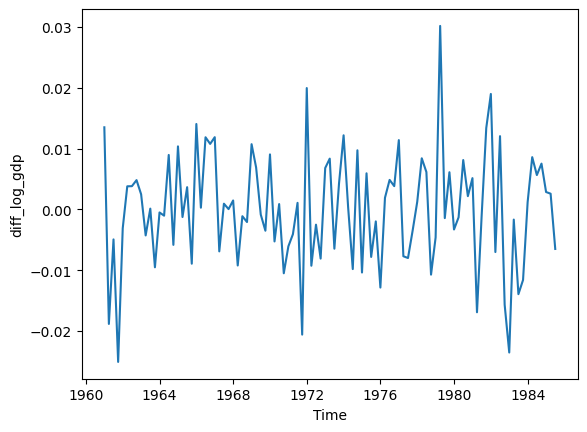

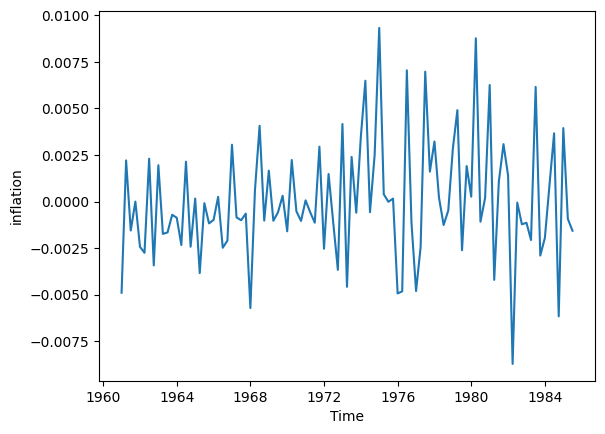

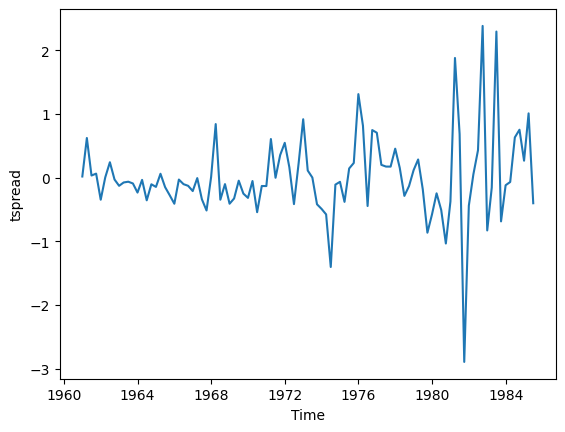

In [16]:
residuals_col = ['diff_log_gdp', 'inflation', 'tspread']
for residual in residuals_col:
    sns.lineplot(data=residuals_var1, y=residual, x = 'Time')
    plt.show()

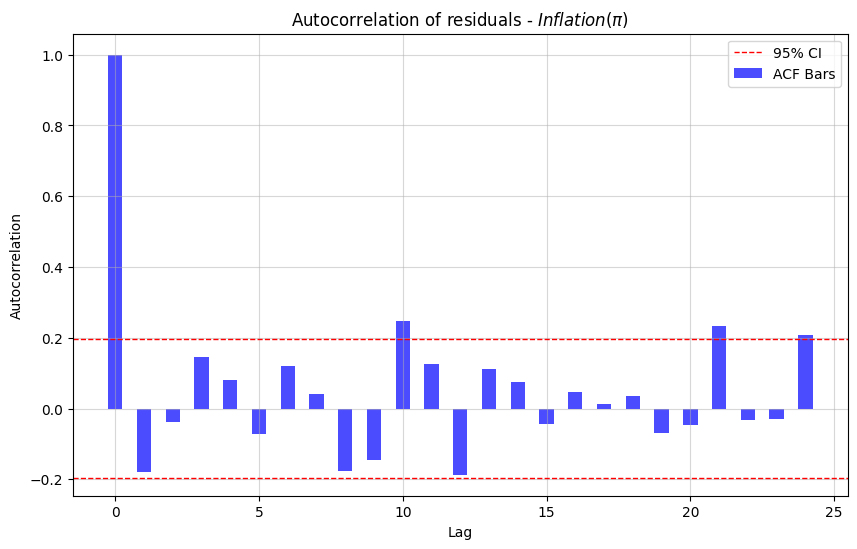

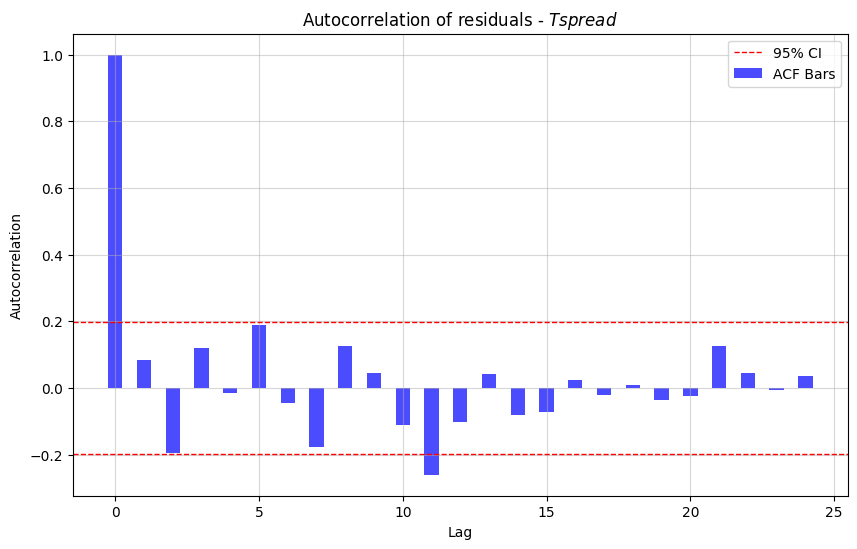

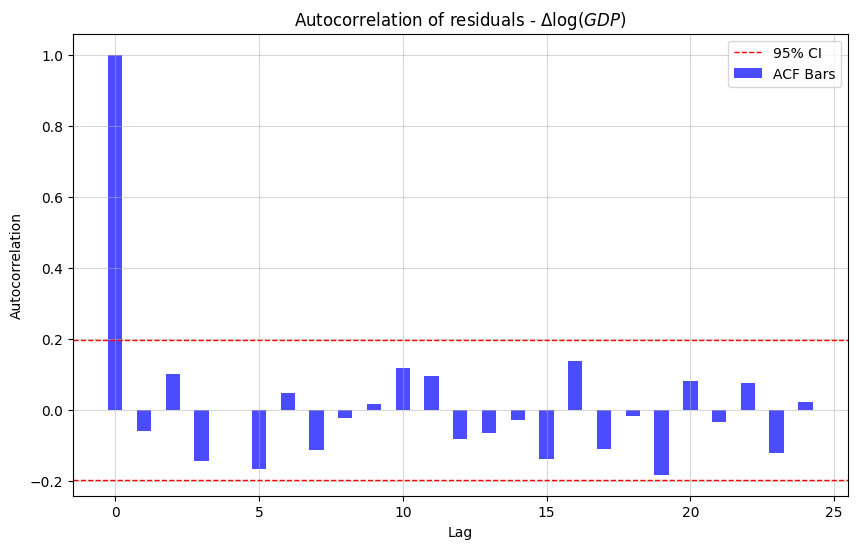

In [17]:
residuals_col = ['inflation', 'tspread', 'diff_log_gdp', ]
titles_res_parcorr = [ r'$Inflation(\pi)$', r'$T spread$', r'$\Delta \log(GDP)$' ]

for residual, title in zip(residuals_col, titles_res_parcorr):
    time_series_data = residuals_var1[residual]

    acf_result = sm.tsa.acf(time_series_data, nlags=24)
    lags = np.arange(0, len(acf_result))

    plt.figure(figsize=(10, 6))
    plt.bar(lags, acf_result, width=0.5, color='b' , alpha=0.7, label='ACF Bars')

    plt.axhline(y=-1.96/np.sqrt(len(time_series_data)), color='red', linestyle='--', linewidth=1, label='95% CI')
    plt.axhline(y=1.96/np.sqrt(len(time_series_data)), color='red', linestyle='--', linewidth=1)

    plt.title(f'Autocorrelation of residuals - {title}')
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.grid(True, zorder=0, alpha=0.5)
    plt.legend()
    plt.show()

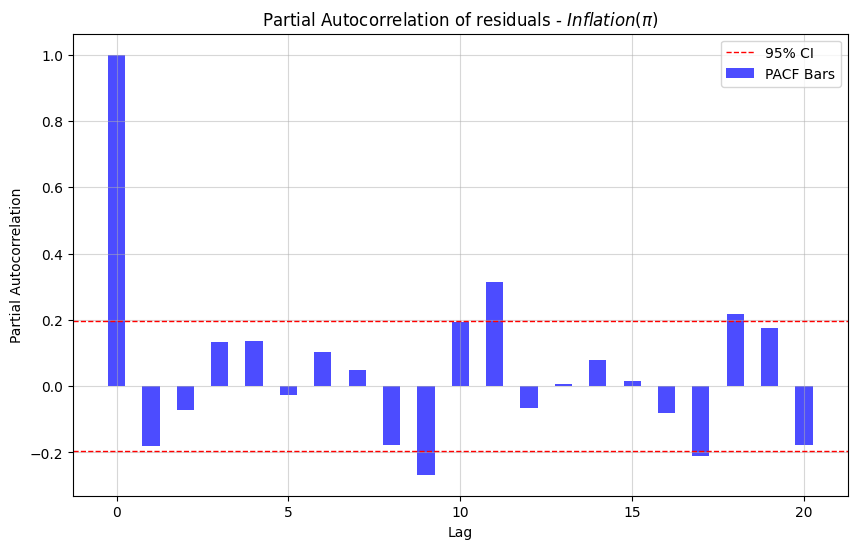

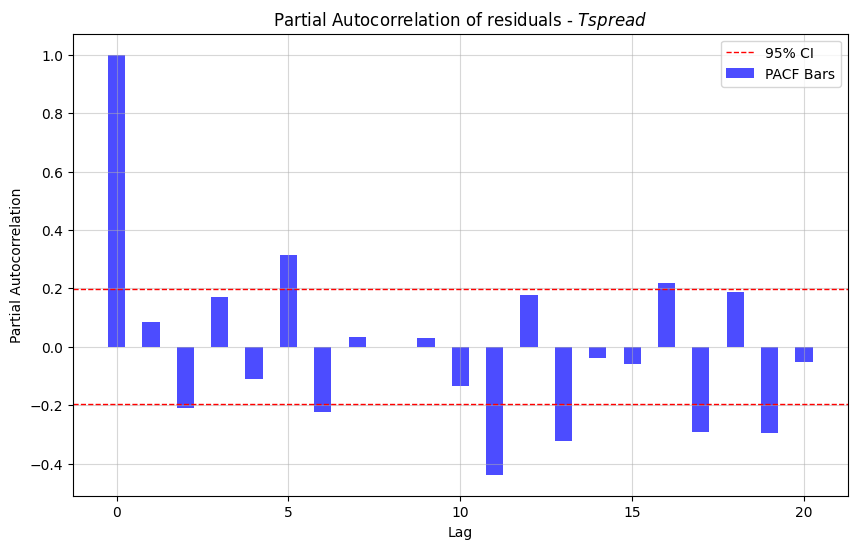

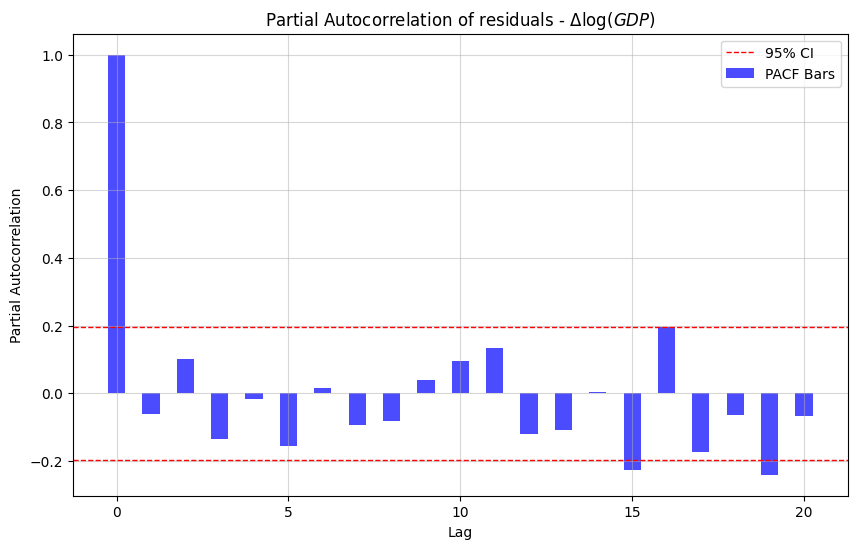

In [18]:
residuals_col = ['inflation', 'tspread', 'diff_log_gdp', ]
titles_res_parcorr = [ r'$Inflation(\pi)$', r'$T spread$', r'$\Delta \log(GDP)$' ]

for residual, title in zip(residuals_col, titles_res_parcorr):
    time_series_data = residuals_var1[residual]
    
    pacf_result = sm.tsa.pacf(time_series_data, nlags=20, method='ols')  # Use PACF instead of ACF

    lags = np.arange(0, len(pacf_result))

    # Create the PACF plot
    plt.figure(figsize=(10, 6))
    plt.bar(lags, pacf_result, width=0.5, color='b', alpha=0.7, label='PACF Bars')  # Change ACF to PACF

    # Add significance lines
    plt.axhline(y=-1.96/np.sqrt(len(time_series_data)), color='red', linestyle='--', linewidth=1, label='95% CI')
    plt.axhline(y=1.96/np.sqrt(len(time_series_data)), color='red', linestyle='--', linewidth=1)

    plt.title(f'Partial Autocorrelation of residuals - {title}')  # Change title
    plt.xlabel("Lag")
    plt.ylabel("Partial Autocorrelation")  # Change y-axis label
    plt.grid(True, zorder=0, alpha=0.5)
    plt.legend()
    plt.show()

PCA

In [22]:
pca_data = pd.read_excel('DatiProject.xlsx', sheet_name=1)
pca_data.head()

,Time,PCECC96,PCDGx,PCESVx,PCNDx,GPDIC1,FPIx,Y033RC1Q027SBEAx,PNFIx,PRFIx,...,TLBSNNBx,TLBSNNBBDIx,TABSNNBx,TNWBSNNBx,TNWBSNNBBDIx,CNCFx,S&P 500,S&P: indust,S&P div yield,S&P PE ratio
249,2022-09-30,0.009838,0.026216,0.007971,0.006417,0.061556,0.004765,0.004580,0.006644,-0.000827,...,-0.001951,442956.17,0.012236,0.020883,38.00,-0.035371,0.039864,0.039544,-0.0249,-0.111524
250,2022-12-30,-0.000027,0.003585,0.001651,-0.006709,0.015110,0.017575,0.038819,0.025413,-0.004202,...,-0.005040,455966.21,0.003836,0.010141,31.35,-0.033988,-0.029542,-0.035777,0.0712,-0.191350
251,2023-03-30,0.004919,-0.002458,0.008028,0.000096,-0.028078,-0.000436,0.012008,0.012913,-0.037658,...,-0.010016,430735.87,0.004731,0.015545,-22.42,0.046908,-0.083250,-0.082668,0.1693,-0.195346
252,2023-06-30,0.003857,0.002238,0.006894,-0.004044,-0.019874,-0.010863,0.013507,0.011548,-0.076541,...,-0.000354,400533.94,0.001887,0.003749,-46.65,0.072343,-0.033799,-0.032161,0.0894,-0.076998
253,2023-09-30,0.002904,-0.002526,0.004470,0.001240,0.008348,-0.013917,-0.012729,0.004333,-0.071640,...,0.005221,405195.09,-0.011736,-0.022679,-10.64,-0.006349,-0.031088,-0.033862,0.0893,-0.028822


In [80]:
sorted(scale(pca_data.drop('Time', axis=1)).mean(axis=1))


[-1.5423808408972595,
 -1.3300752415069006,
 -0.8634670504024674,
 -0.8200401911920487,
 -0.6947833437007672,
 -0.5933762530424772,
 -0.5678868812890179,
 -0.5250383572805271,
 -0.4469074530990127,
 -0.41490038109737254,
 -0.4008206895954587,
 -0.39996622074543525,
 -0.3992467974347637,
 -0.36117001316783237,
 -0.3449229525077756,
 -0.33414268948357523,
 -0.32498417814680913,
 -0.3245896012149727,
 -0.27318848969871495,
 -0.2723941295101345,
 -0.24019023531360323,
 -0.23961787114575409,
 -0.2394616558651379,
 -0.23843156689736467,
 -0.23817787667675341,
 -0.2262015549687141,
 -0.22386235118871928,
 -0.2212881572682415,
 -0.22087684456471093,
 -0.22014116593023447,
 -0.21972762533376894,
 -0.21124326675911764,
 -0.20619147425969617,
 -0.20166913154081445,
 -0.19869715562526227,
 -0.1983994744993194,
 -0.19686061448568626,
 -0.189134614240177,
 -0.18199506636145157,
 -0.18158154227415318,
 -0.17888556412579343,
 -0.1777825067870052,
 -0.17459665106476766,
 -0.1684667956867569,
 -0.166188

In [24]:
pca_df = pca_data[(pca_data['Time'] < '1985-07-01') & (pca_data['Time'] > '1960-07-10')].reset_index(drop=True)
pca_df.tail()

,Time,PCECC96,PCDGx,PCESVx,PCNDx,GPDIC1,FPIx,Y033RC1Q027SBEAx,PNFIx,PRFIx,...,TLBSNNBx,TLBSNNBBDIx,TABSNNBx,TNWBSNNBx,TNWBSNNBBDIx,CNCFx,S&P 500,S&P: indust,S&P div yield,S&P PE ratio
95,1984-06-30,0.017773,0.037723,0.014685,0.015100,0.060726,0.054516,0.054852,0.041238,0.093212,...,0.013929,269226.84,-0.000626,-0.006021,2.33,-0.009216,0.017060,0.021293,-0.0432,0.041314
96,1984-09-30,0.015810,0.048212,0.010284,0.012122,0.092837,0.054249,0.084126,0.058694,0.041529,...,0.019555,263733.89,0.010242,0.006781,-23.93,0.040169,0.001409,0.000000,0.0420,0.003753
97,1984-12-30,0.008265,0.037114,0.004444,0.002600,0.092255,0.030882,0.017247,0.031311,0.029755,...,0.024017,266678.72,0.003000,-0.005109,-12.59,0.012912,-0.033118,-0.031927,0.2026,-0.060605
98,1985-03-30,0.013912,0.023037,0.007842,0.021656,0.032002,0.038317,0.048113,0.045553,0.017467,...,0.029874,270398.31,0.000965,-0.010439,-18.08,0.016023,-0.029104,-0.022556,0.2041,-0.079136
99,1985-06-30,0.007389,0.000376,0.012463,0.000773,0.021409,0.019655,0.030774,0.030226,-0.011683,...,0.027950,261555.34,0.002197,-0.008331,-45.28,0.061200,0.030142,0.030269,-0.0757,-0.031468


In [36]:
np.set_printoptions(suppress=True)

In [93]:
pca = PCA()
pca.fit(scale(pca_df.drop('Time', axis=1)))
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.2307717  0.12611882 0.06027041 0.0465617  0.03761851 0.03094688
 0.0284609  0.02719945 0.0243169  0.02003607 0.0189579  0.01803227
 0.01659267 0.01467814 0.01380267 0.01358832 0.01283198 0.01256381
 0.01182472 0.01096626 0.01019535 0.00975881 0.00936735 0.00886552
 0.00835743 0.00822991 0.00798904 0.00749351 0.00707353 0.00675999
 0.00652237 0.00621198 0.00592116 0.00555737 0.00538771 0.00505608
 0.00492081 0.00480758 0.00451443 0.00446009 0.00417221 0.00383659
 0.00364429 0.0036097  0.0032956  0.00326207 0.00316685 0.0030328
 0.00293953 0.00269314 0.00263752 0.00254119 0.00241975 0.00236723
 0.00222016 0.00214824 0.00209735 0.00204518 0.00194034 0.00181045
 0.00171823 0.00168817 0.00164519 0.00158751 0.00152479 0.00149959
 0.00137783 0.00126787 0.00122896 0.00119863 0.00111294 0.00106281
 0.00100507 0.00096934 0.00090756 0.00077907 0.00076956 0.00075426
 0.00072737 0.0006798  0.00061536 0.00060459 0.00058395 0.00054972
 0.00052939 0.00049741 0.00043895 0.00042142 0.00037999 0.00033

<Axes: >

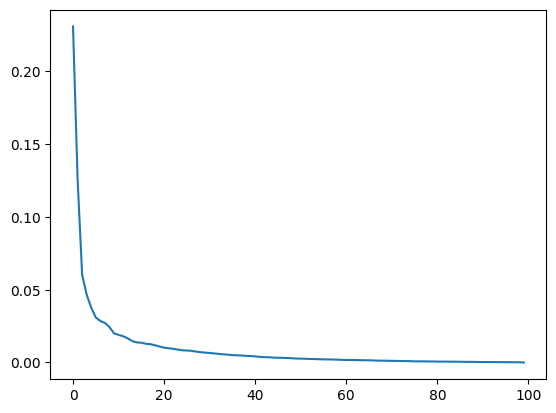

In [89]:
sns.lineplot(y = pca.explained_variance_ratio_, x = list(range(100)))

In [94]:
pccomp = pca.fit_transform(scale(pca_df.drop('Time', axis=1)))
pd.DataFrame(data = pccomp)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.421198,0.878673,-4.464649,2.890738,1.505926,-1.130884,0.019186,5.919213,1.860362,-0.593811,...,0.517643,0.359288,0.243400,0.720802,-0.283451,0.161558,-0.004246,-0.140040,-0.076384,3.339216e-15
1,-8.962030,-2.076779,-2.828245,-6.121924,4.312182,2.842625,6.512964,-3.742701,-2.968615,0.755004,...,-0.091607,-0.116418,-0.107827,0.121882,-0.073017,0.252778,-0.171376,-0.094217,-0.017286,3.339216e-15
2,4.743752,2.791008,-2.877493,7.159995,-2.108550,-2.646690,0.591007,3.557964,1.622081,0.651164,...,-0.402558,-0.186379,0.098709,-0.160390,0.080037,0.105547,-0.277619,0.071477,-0.004924,3.339216e-15
3,8.478183,-2.006001,-2.319815,1.500167,3.411258,-1.528391,1.332720,-0.377766,0.794783,0.885954,...,-0.150326,0.283659,-0.081616,-0.272256,-0.307810,0.009415,0.060074,-0.084241,0.260902,3.339216e-15
4,11.276142,-1.875850,-0.760852,5.600523,1.656741,1.159469,0.319975,6.881982,2.078247,0.745511,...,0.005047,-0.158304,-0.066031,-0.149750,0.076243,0.137724,0.318947,0.073362,0.269133,3.339216e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-8.207729,-0.908980,7.879886,0.340159,-0.792282,-4.164966,-1.052907,1.156595,6.527725,-0.625376,...,-0.026036,0.135952,0.021921,-0.111409,-0.004679,-0.105100,-0.159829,-0.015563,-0.025234,3.339216e-15
96,-8.228976,-1.549758,-2.243094,-5.457438,-7.058565,-3.438059,3.376485,-0.805502,-1.392580,0.781322,...,-0.069981,0.314616,0.062826,-0.086581,-0.012994,0.006152,-0.312741,-0.083613,-0.075948,3.339216e-15
97,-9.346151,-0.082117,3.492521,2.811773,-3.008047,-3.585072,1.230424,0.430973,-0.839036,-2.109715,...,-0.346884,-0.350427,-0.519110,-0.107061,-0.099922,-0.067682,-0.150243,-0.011058,0.018147,3.339216e-15
98,-5.628765,2.875574,-1.125753,-2.321794,-2.836559,-4.913020,-0.152481,2.629607,4.419729,-1.662883,...,-0.006652,0.178395,0.135904,0.171126,0.128356,-0.023745,-0.153603,-0.000736,-0.089757,3.339216e-15


In [97]:
first_comp = pccomp[0]
first_comp

array([ 3.42119825,  0.87867332, -4.46464878,  2.89073832,  1.50592627,
       -1.13088394,  0.01918557,  5.91921348,  1.86036154, -0.59381061,
       -2.16203892, -1.34317522,  0.19468213, -0.35663978, -0.75733019,
       -1.19896368, -0.8372773 , -0.14457251, -0.86398729, -1.61077073,
       -1.08042657, -1.1447519 , -1.68214049,  2.05794953,  0.37682994,
       -0.65776144, -1.46565153, -1.76059019,  1.03730201,  0.15249548,
       -1.17179586, -0.5591443 ,  0.42942502,  1.21538113, -0.45973361,
       -1.08391282, -0.15775304, -1.0475149 ,  1.06797501, -2.01059247,
       -2.33889737, -0.32382364,  1.88808056,  1.36508045,  0.21888714,
        1.5016398 ,  0.32227821,  1.35423621, -0.21349418, -1.10351743,
       -2.08063224, -0.5199072 , -0.49731071, -0.95213574,  0.21389361,
       -0.26330657,  0.08085211,  0.14191621,  0.21445137, -0.26427072,
        0.401537  ,  0.61969826,  1.14552415, -0.44025234,  0.88792953,
       -0.71537716, -0.7364826 , -0.20537766,  0.48002266,  0.02

In [130]:
pca.components_[0]

load_df = pd.DataFrame({
    'Index': list(range(1,246)),
    'Loading': abs(pca.components_[0])
})

load_df.tail()


,Index,Loading
240,241,0.020077
241,242,0.003499
242,243,0.006325
243,244,0.001714
244,245,0.003465


In [131]:
load_df.sort_values('Loading').tail(30)

,Index,Loading
17,18,0.107384
176,177,0.108330
62,63,0.108450
24,25,0.108710
48,49,0.108829
216,217,0.109873
7,8,0.110450
72,73,0.110607
6,7,0.111009
5,6,0.111109


Random Walk